In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../artifacts/Reddit_Data.csv")
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [3]:
df.loc[0,["clean_comment"]].tolist()

[' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ']

# Cleaning

In [4]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [5]:
df[df["clean_comment"].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(350)

In [8]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#check comment only white space
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [11]:
df = df[~(df['clean_comment'].str.strip()=='')]
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


# Processing

In [12]:
df["clean_comment"] = df["clean_comment"].str.lower()
df["clean_comment"] = df["clean_comment"].str.strip()
df.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [13]:
df[df["clean_comment"].apply(lambda x:x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [14]:
# identify comment containing URLs
url_pattern = r'http[s]>://(:[a-zA-Z]|[0-9]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df[df['clean_comment'].str.contains(url_pattern,regex=True)]

,clean_comment,category


In [15]:
#check if comment have new line
df[df["clean_comment"].str.contains('\n')]

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [16]:
df["clean_comment"] = df["clean_comment"].str.replace("\n",' ',regex=True)

#check if comment have new line
df[df["clean_comment"].str.contains('\n')]

,clean_comment,category


Text(0.5, 1.0, 'Sentiment Distribution')

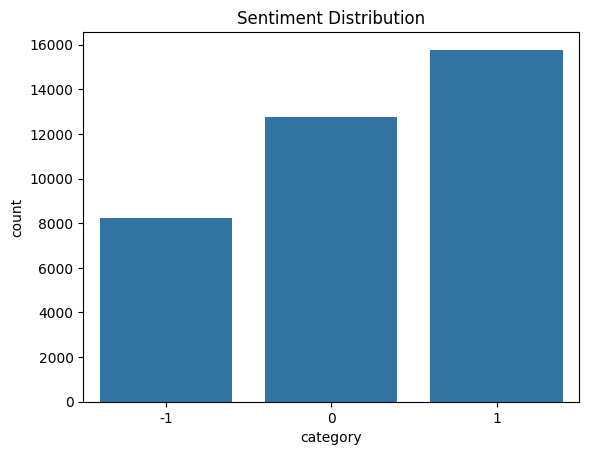

In [17]:
sns.countplot(
    data=df,
    x='category'
).set_title(
    'Sentiment Distribution'
)

mostly comment is Positive feedback

In [18]:
#calculate word count
df["word_count"] = df["clean_comment"].apply(lambda x:len(x.split()))
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


<Axes: xlabel='word_count', ylabel='Count'>

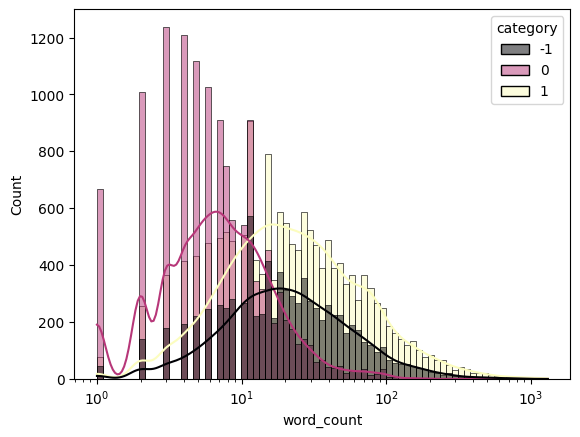

In [19]:
#distribution word count for each category
sns.histplot(
    data=df,
    x='word_count',
    hue='category',
    kde=True,
    log_scale=True,
    palette='magma'
)

In [20]:
import nltk
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
df["num_stop_words"] = df["clean_comment"].apply(lambda x: len([word for word in x.split() if word in stop_words]))
df

,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45
...,...,...,...,...
37244,jesus,0,1,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0
37246,downvote karna tha par upvote hogaya,0,6,0
37247,haha nice,1,2,0


<Axes: xlabel='num_stop_words', ylabel='Count'>

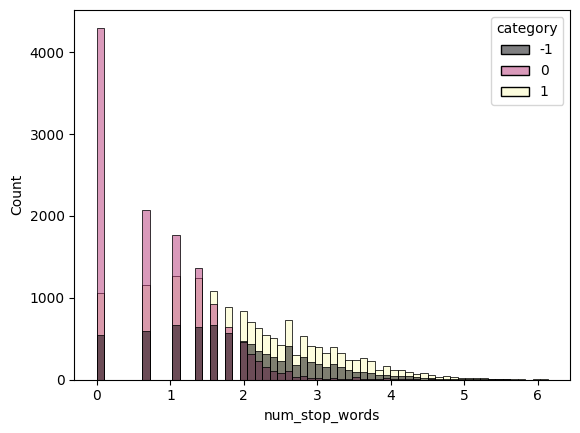

In [21]:
sns.histplot(
    x=np.log1p(df["num_stop_words"]),
    hue=df["category"],
    palette='magma'
)

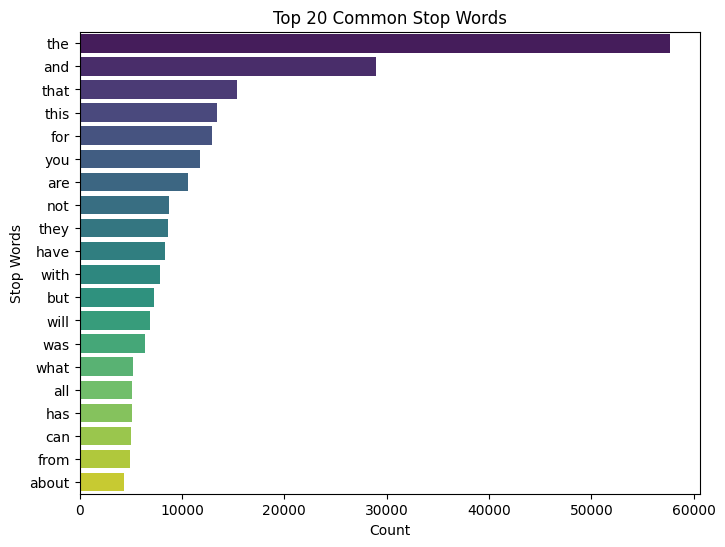

In [22]:
#top stop words
from collections import Counter

all_stop_words = [word for comment in df["clean_comment"] for word in comment.split() if word in stop_words]
most_common_stop_words = Counter(all_stop_words).most_common(20)
top_20_df = pd.DataFrame(most_common_stop_words,columns=["stop_words","count"])

plt.figure(figsize=(8,6))
sns.barplot(data=top_20_df,x='count',y='stop_words',palette='viridis')
plt.title('Top 20 Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Words')
plt.show()

In [23]:
df["num_characters"] = df["clean_comment"].apply(len)
df

,clean_comment,category,word_count,num_stop_words,num_characters
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690
...,...,...,...,...,...
37244,jesus,0,1,0,5
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0,99
37246,downvote karna tha par upvote hogaya,0,6,0,36
37247,haha nice,1,2,0,9


<Axes: xlabel='num_characters', ylabel='Count'>

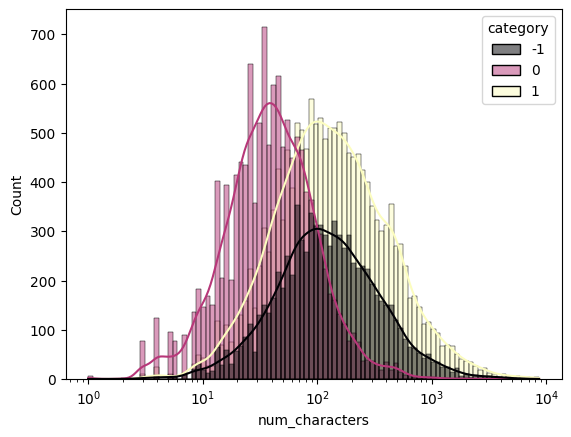

In [24]:
sns.histplot(
    data=df,
    x='num_characters',
    hue='category',
    kde=True,
    log_scale=True,
    palette='magma'
)

In [25]:
#count punctuation
df["num_punctuation_chars"] = df["clean_comment"].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.head()

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


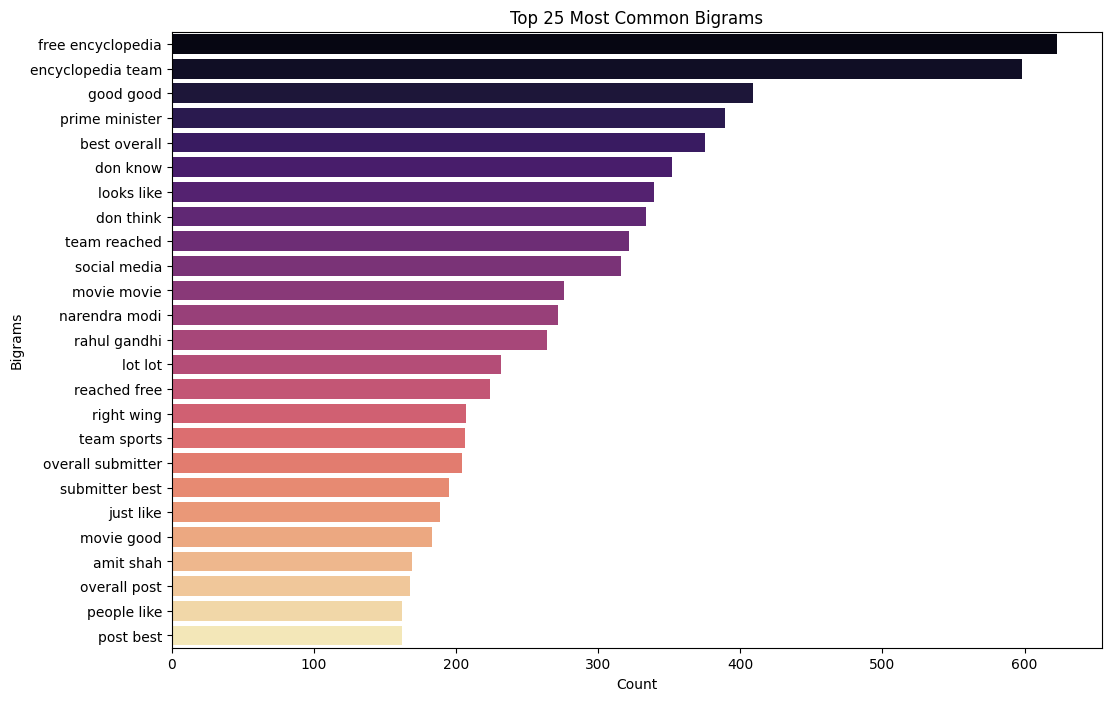

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(df["clean_comment"],25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram','count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigrams')

plt.show()

In [27]:
#remove non_english characters from the 'clean_comment' 

import re
df["clean_comment"] = df["clean_comment"].apply(lambda x : re.sub(r'[^A-Za-z0-9\s!?.,]','',str(x)))

df.head()

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [28]:
all_text = ' '.join(df["clean_comment"])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency')
char_frequency_df

,character,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [ ]:
#redesign stop words
# 'not','but','however','no','yet' will help to understand some comment will negative comment or not
stop_words = set(stopwords.words('english')) - {'not','but','however','no','yet'}

df["clean_comment"] = df["clean_comment"].apply(lambda x:' '.join([word for word in x.split() if x.lower() not in stop_words]))

df.head()

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [33]:
#proccessing the word to be the root word
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df["clean_comment"] = df["clean_comment"].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)


df.head()

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism ha very much lot compatible with chri...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


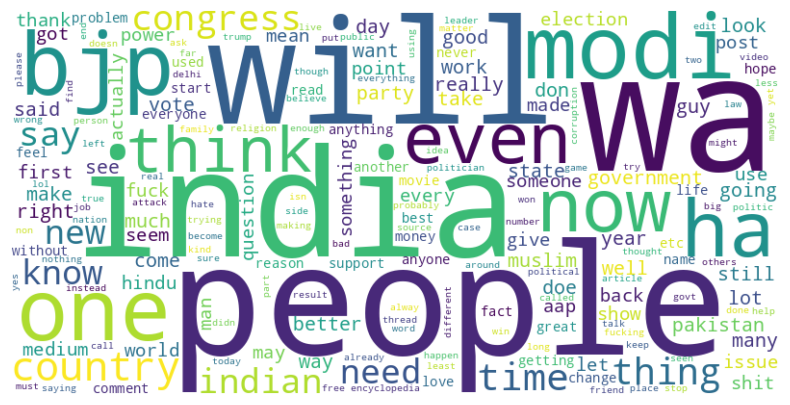

In [38]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df['clean_comment'])

- **“people”** is the largest term, showing that discussion centers on “the people” or “the public.”  
- **“India”** and **“Indian”** also feature prominently, confirming that the topic is about the country or its citizens.  
- **“modi”** stands out, indicating frequent mention of Prime Minister Narendra Modi.  
- Modal and opinion words like **“will,” “would,” “think,” “make,”** and **“even”** suggest many predictions, opinions, and expectations (“will,” “might,” “think,” “do,” “even”).  
- Political terms **“congress,” “party,” “AAP,” “government”** appear, reflecting debate about parties and governance.  
- Religious/community identifiers such as **“hindu”** and **“muslim”** are present, pointing to identity-based discussion.  
- Time‑related words like **“now,” “time,” “country”** highlight a focus on current events or conditions.

**Overall**, the word cloud reveals that the texts are largely opinion‑driven conversations about Indian politics and governance—emphasizing citizens (“people”), the figure of Modi, and forward‑looking commentary (“will,” “would,” “think”).

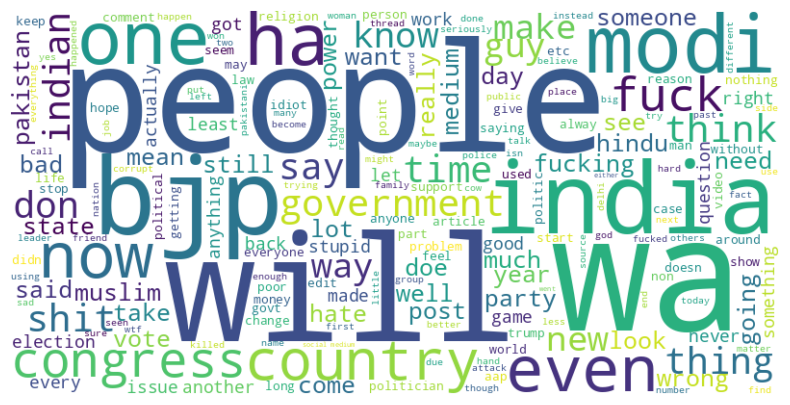

In [39]:
plot_word_cloud(df[df["category"]==-1]['clean_comment'])

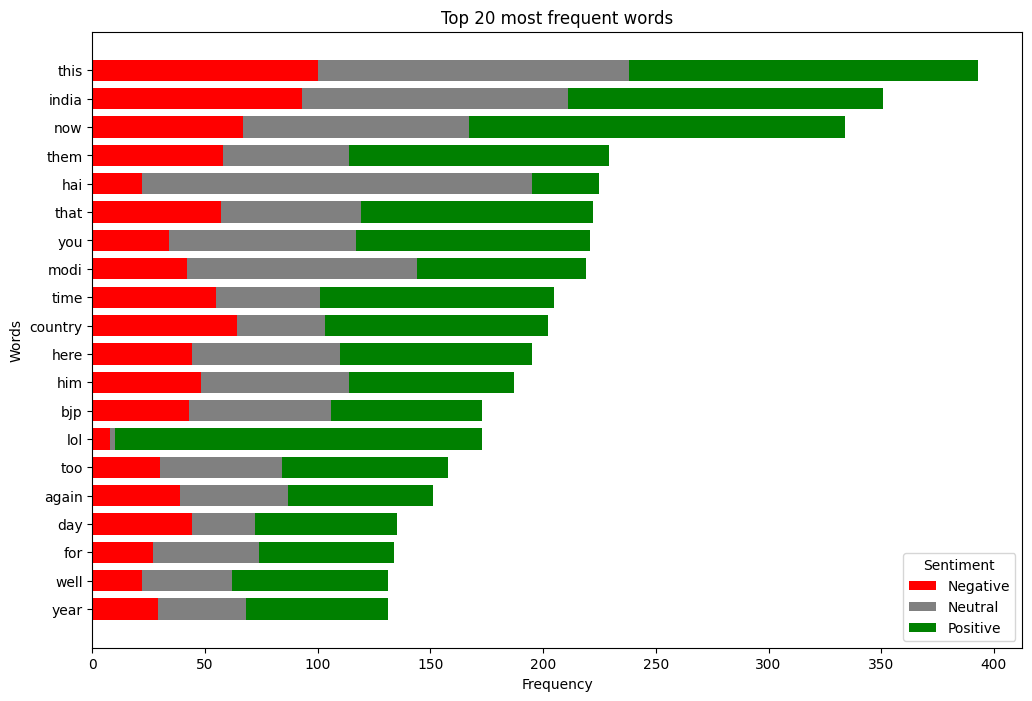

In [44]:
def plot_top_n_words_by_category(df,n=20, start=0):
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1:0, 0:0, 1:0}
        
        word_category_counts[word][category] +=1
    
    total_word_counts = {word:sum(counts.values()) for word, counts in word_category_counts.items()}

    most_common_stop_words = sorted(total_word_counts.items(), key = lambda x:x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_stop_words]

    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    plt.figure(figsize=(12,8))
    bar_width = 0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts,color='gray', label='Neutral', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)],color='green', label='Positive', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} most frequent words')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_n_words_by_category(df)